## TSNE PLOT

In [16]:
import torch
import torch.nn as nn
from sklearn.manifold import TSNE
from utils import get_data_loader
import matplotlib.pyplot as plt
from train_q2 import ResNet

### Model

In [26]:
model_path = "checkpoint-model-epoch9.pth" ## load the model
model = ResNet(20)
model= torch.load(model_path)
feature_extractor_model = nn.Sequential(*list(model.children())[:-1])
model = feature_extractor_model.to('cuda')

model.eval()

Sequential(
  (0): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

### Loading Data

In [27]:

test_loader = get_data_loader('voc', train=False, batch_size=1, split='test', inp_size=224)

outputs_list = []
targets_list = []
indices = []

for i, (img, target, j) in enumerate(test_loader):
    if i == 0:
        print(j)
    if i > 999:
        break
    with torch.no_grad():
        output = model(img.to('cuda'))
    outputs_list.append(output)
    targets_list.append(target)
    indices.append(i)

outputs = torch.cat(outputs_list, dim=0)
targets = torch.cat(targets_list, dim=0)

preloading annotations
tensor([[[[-0.9465, -0.9543, -0.9543,  ..., -0.9622, -0.9622, -0.9700],
          [-0.9308, -0.9465, -0.9465,  ..., -0.9622, -0.9622, -0.9700],
          [-0.9386, -0.9465, -0.9465,  ..., -0.9622, -0.9622, -0.9622],
          ...,
          [-0.9543, -0.9543, -0.9543,  ..., -0.6327, -0.6720, -0.6641],
          [-0.9543, -0.9543, -0.9543,  ..., -0.6327, -0.6171, -0.6798],
          [-0.9465, -0.9543, -0.9543,  ..., -0.6641, -0.7033, -0.7112]],

         [[-0.8905, -0.8983, -0.8983,  ..., -0.9062, -0.9062, -0.8983],
          [-0.8748, -0.8905, -0.8905,  ..., -0.9062, -0.9062, -0.8983],
          [-0.8826, -0.8905, -0.8905,  ..., -0.9062, -0.9062, -0.9062],
          ...,
          [-0.8983, -0.8983, -0.8983,  ..., -0.4120, -0.4356, -0.3885],
          [-0.8983, -0.8983, -0.8983,  ..., -0.3885, -0.3493, -0.4042],
          [-0.8905, -0.8983, -0.8983,  ..., -0.4042, -0.4356, -0.4669]],

         [[-0.7905, -0.7983, -0.7983,  ..., -0.8140, -0.8140, -0.8140],
       

In [5]:
outputs = outputs.view(outputs.size(0), -1).cpu().numpy()
targets = targets.cpu().numpy()

### TSNE

In [33]:
list(np.arange(1000)) == indices

True

In [6]:
tsne = TSNE(n_components=2)
features_tsne = tsne.fit_transform(outputs)

In [7]:
features_tsne.shape

(1000, 2)

### Plot

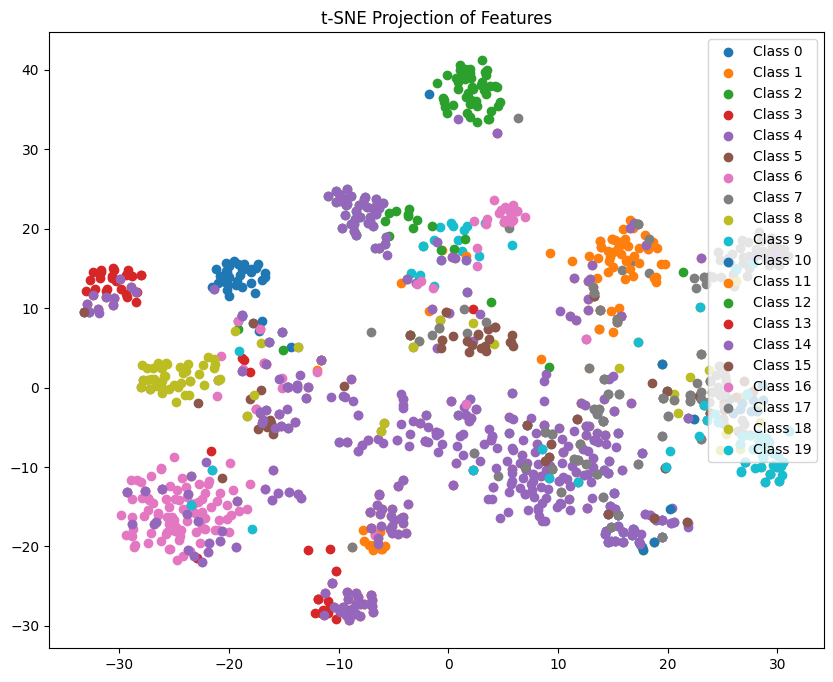

In [20]:
# class_colors = plt.cm.tab20(np.arange(20))

plt.figure(figsize=(10, 8))
for i in range(20):
    indices = np.where(targets[:, i] == 1)[0]
    plt.scatter(features_tsne[indices, 0], features_tsne[indices, 1], label=f"Class {i}")

plt.title('t-SNE Projection of Features')
# plt.legend(title='Object Class', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.legend(loc="upper right") 
plt.savefig('tsne.png')
# sns.despine() 